In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime

# Import API key
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# # Add the lats and longs to a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
lat_lngs = []
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [5]:
# list for cities
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | samusu
City not found. Skipping...
Processing Record 2 of Set 1 | muros
Processing Record 3 of Set 1 | necochea
Processing Record 4 of Set 1 | husavik
Processing Record 5 of Set 1 | salalah
Processing Record 6 of Set 1 | chokurdakh
Processing Record 7 of Set 1 | chuy
Processing Record 8 of Set 1 | shakawe
Processing Record 9 of Set 1 | talakan
Processing Record 10 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | sheridan
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | codrington
Processing Record 20 of Set 1 | maniitsoq
Processing Record 21 of Set 1 | luoyang
Processing 

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Muros,42.7762,-9.0603,64.24,88,100,13.80,ES,2021-10-16 18:13:59
1,Necochea,-38.5473,-58.7368,64.83,44,0,10.02,AR,2021-10-16 18:13:59
2,Husavik,66.0449,-17.3389,30.69,78,93,5.26,IS,2021-10-16 18:14:00
3,Salalah,17.0151,54.0924,78.89,89,0,1.14,OM,2021-10-16 18:14:00
4,Chokurdakh,70.6333,147.9167,-5.78,100,91,4.68,RU,2021-10-16 18:14:00
5,Chuy,-33.6971,-53.4616,59.61,50,7,11.59,UY,2021-10-16 18:14:01
6,Shakawe,-18.3667,21.8500,81.66,11,2,3.53,BW,2021-10-16 18:14:01
7,Talakan,50.3167,130.3667,19.69,80,46,8.37,RU,2021-10-16 18:14:02
8,Bredasdorp,-34.5322,20.0403,51.28,54,92,12.48,ZA,2021-10-16 18:14:03
9,Sheridan,44.8333,-106.9173,64.31,44,1,1.99,US,2021-10-16 18:14:03


In [7]:
# Reorder columns
column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]


In [8]:
# Create the output file CSV
output_data_file = "weather_data/cities.csv"
# Export the City Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [9]:
# Extract relevant field from the DF for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

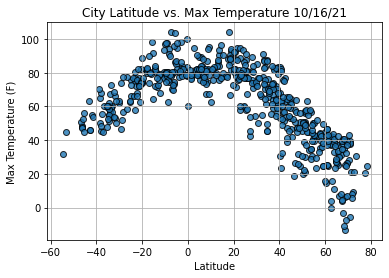

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

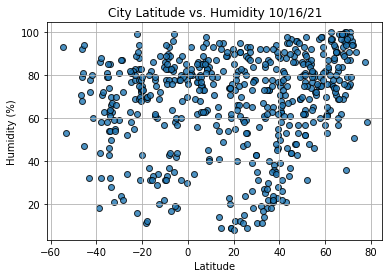

In [11]:
# Build the scatter plots for lat vd humidity
plt.scatter(lats, 
            humidity, 
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

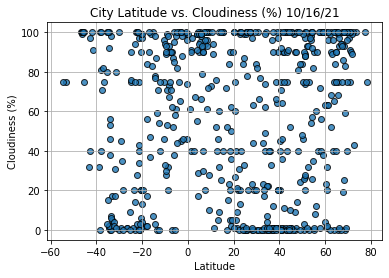

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

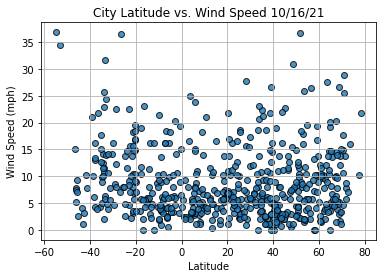

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [14]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
index13 = city_data_df.loc[13]
index13

City                  East London
Country                        ZA
Date          2021-10-16 18:14:04
Lat                      -33.0153
Lng                       27.9116
Max Temp                    60.49
Humidity                       63
Cloudiness                      5
Wind Speed                  24.38
Name: 13, dtype: object

In [16]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Muros,ES,2021-10-16 18:13:59,42.7762,-9.0603,64.24,88,100,13.80
2,Husavik,IS,2021-10-16 18:14:00,66.0449,-17.3389,30.69,78,93,5.26
3,Salalah,OM,2021-10-16 18:14:00,17.0151,54.0924,78.89,89,0,1.14
4,Chokurdakh,RU,2021-10-16 18:14:00,70.6333,147.9167,-5.78,100,91,4.68
7,Talakan,RU,2021-10-16 18:14:02,50.3167,130.3667,19.69,80,46,8.37


In [17]:
# Creatte North and South hemisphere DF
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

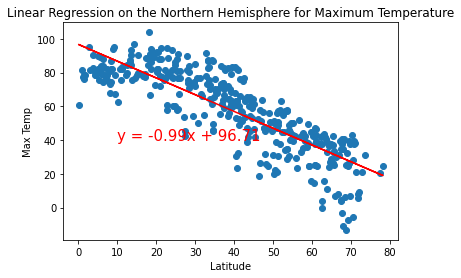

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10,40))

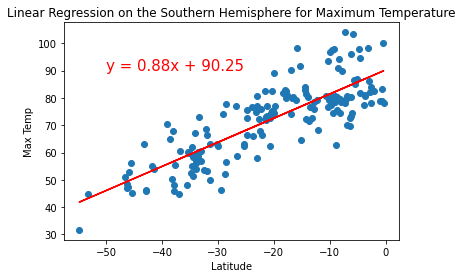

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50,90))

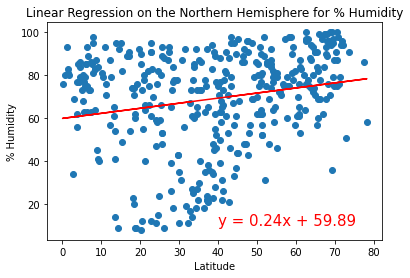

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(40,10))

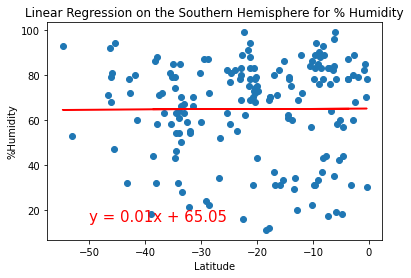

In [21]:
# Lineare regression on the South Hemi
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function
plot_linear_regression(x_values, y_values, 
                        "Linear Regression on the Southern Hemisphere for % Humidity", 
                        "%Humidity", (-50,15))

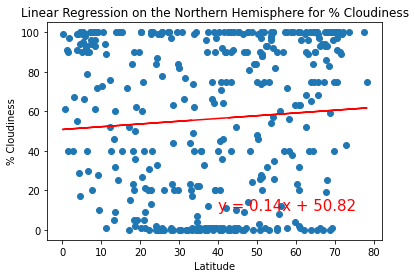

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(40,10))

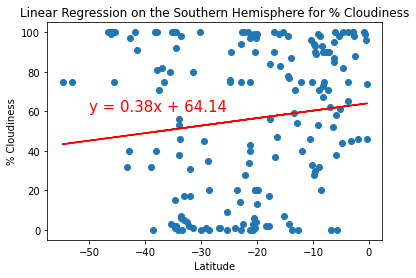

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                        '% Cloudiness',(-50,60))

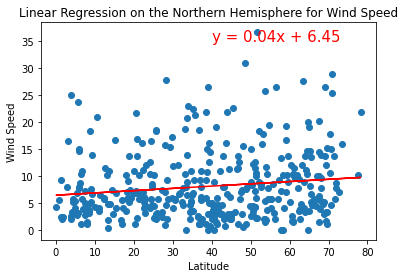

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,35))

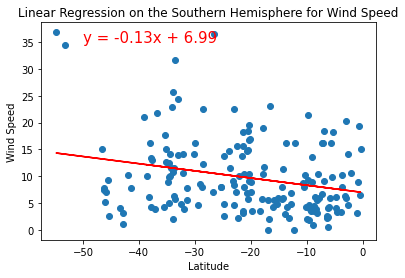

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,35))